In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
plt.style.use('dark_background')

In [2]:
player_dataset = pd.read_csv('player.csv')
player_dataset.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,Arizona State
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,6/12/1994,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,Arizona State
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [3]:
player_dataset.shape

(464, 14)

In [4]:
player_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         464 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      464 non-null    object
dtypes: int64(2), object(12)
memory usage: 50.9+ KB


In [5]:
player_dataset = player_dataset.dropna()

In [6]:
player_dataset.isnull().sum().sum()

0

In [7]:
player_dataset = player_dataset.drop(['full_name', 'b_day', 'height', 'weight', 'college'], axis = 1)
player_dataset.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
0,97,#23,Los Angeles Lakers,F,$37436858,USA,2003,1,1
1,97,#2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
2,96,#34,Milwaukee Bucks,F-G,$25842697,Greece,2013,1,15
3,96,#7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,#13,Houston Rockets,G,$38199000,USA,2009,1,3


In [8]:
def removehash(value):
    value = value[1:]
    return int(value)

player_dataset['jersey'] = player_dataset['jersey'].apply(removehash)

In [9]:
player_dataset.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
0,97,23,Los Angeles Lakers,F,$37436858,USA,2003,1,1
1,97,2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
2,96,34,Milwaukee Bucks,F-G,$25842697,Greece,2013,1,15
3,96,7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,$38199000,USA,2009,1,3


In [10]:
player_dataset['salary'] = player_dataset['salary'].apply(removehash)
player_dataset.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
0,97,23,Los Angeles Lakers,F,37436858,USA,2003,1,1
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
2,96,34,Milwaukee Bucks,F-G,25842697,Greece,2013,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3


In [11]:
player_dataset['team'].value_counts()

Atlanta Hawks             36
Milwaukee Bucks           19
Brooklyn Nets             19
Los Angeles Lakers        18
Dallas Mavericks          18
Los Angeles Clippers      17
Phoenix Suns              16
Philadelphia 76ers        16
New Orleans Pelicans      15
Denver Nuggets            15
Orlando Magic             15
Indiana Pacers            15
Chicago Bulls             15
New York Knicks           15
Toronto Raptors           15
Sacramento Kings          14
Oklahoma City Thunder     14
San Antonio Spurs         14
Washington Wizards        14
Boston Celtics            14
Detroit Pistons           14
Utah Jazz                 14
Minnesota Timberwolves    14
Portland Trail Blazers    14
Houston Rockets           14
Miami Heat                13
Memphis Grizzlies         13
Cleveland Cavaliers       12
Golden State Warriors     12
Charlotte Hornets         10
Name: team, dtype: int64

In [12]:
player_dataset['country'].value_counts()

USA                                 346
Canada                               15
Australia                            10
France                                9
Serbia                                7
Germany                               6
Croatia                               6
Spain                                 6
Greece                                5
Cameroon                              5
Latvia                                4
Slovenia                              4
Italy                                 4
Turkey                                4
Nigeria                               3
Brazil                                2
Ukraine                               2
Democratic Republic of the Congo      2
Lithuania                             2
The Bahamas                           2
Bosnia and Herzegovina                2
New Zealand                           1
Mali                                  1
Haiti                                 1
Angola                                1


In [13]:
def removecountryoutlier(value):
    if value not in ['USA', 'Canada', 'Australia']:
        return 'Others'
    else:
        return value

player_dataset['country'] = player_dataset['country'].apply(removecountryoutlier)
player_dataset['country'].value_counts()
   

USA          346
Others        93
Canada        15
Australia     10
Name: country, dtype: int64

In [14]:
player_dataset['position'].value_counts()

G      184
F      146
C       53
F-C     39
G-F     21
F-G     15
C-F      6
Name: position, dtype: int64

In [15]:
player_dataset.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
0,97,23,Los Angeles Lakers,F,37436858,USA,2003,1,1
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
2,96,34,Milwaukee Bucks,F-G,25842697,Others,2013,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3


In [16]:
player_dataset['draft_round'].unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      1
      ..
459    1
460    1
461    1
462    1
463    1
Name: draft_round, Length: 464, dtype: object>

In [17]:
player_dataset['draft_peak'].unique

<bound method Series.unique of 0       1
1      15
2      15
3       2
4       3
       ..
459     4
460     3
461    27
462    24
463     4
Name: draft_peak, Length: 464, dtype: object>

In [18]:
def removeundrafted(value):
    if value=='Undrafted':
        return 
    else:
        return value
    
player_dataset['draft_round'] = player_dataset['draft_round'].apply(removeundrafted)
player_dataset['draft_peak'] = player_dataset['draft_peak'].apply(removeundrafted)

player_dataset = player_dataset.dropna()

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
player_dataset['position'] = le.fit_transform(player_dataset['position'])
player_dataset['country'] = le.fit_transform(player_dataset['country'])
player_dataset['team'] = le.fit_transform(player_dataset['team'])

player_dataset.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
0,97,23,13,2,37436858,3,2003,1,1
1,97,2,12,2,32742000,3,2011,1,15
2,96,34,16,4,25842697,2,2013,1,15
3,96,7,2,2,37199000,3,2007,1,2
4,96,13,10,5,38199000,3,2009,1,3


In [20]:
x = player_dataset.drop(['salary'], axis = 1)
y = player_dataset['salary']

In [21]:
print(x)

     rating  jersey  team  position  country  draft_year draft_round  \
0        97      23    13         2        3        2003           1   
1        97       2    12         2        3        2011           1   
2        96      34    16         4        2        2013           1   
3        96       7     2         2        3        2007           1   
4        96      13    10         5        3        2009           1   
..      ...     ...   ...       ...      ...         ...         ...   
459      88       3    20         5        3        2005           1   
460      88       3    29         5        3        2012           1   
461      87      27    28         0        2        2013           1   
462      87       7    27         5        3        2006           1   
463      87       6     6         3        2        2015           1   

    draft_peak  
0            1  
1           15  
2           15  
3            2  
4            3  
..         ...  
459          4  

In [22]:
print(y)

0      37436858
1      32742000
2      25842697
3      37199000
4      38199000
         ...   
459    41358814
460    28751774
461    27525281
462    30500000
463    29467800
Name: salary, Length: 397, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

In [26]:
diff = y_test - predictions

c:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

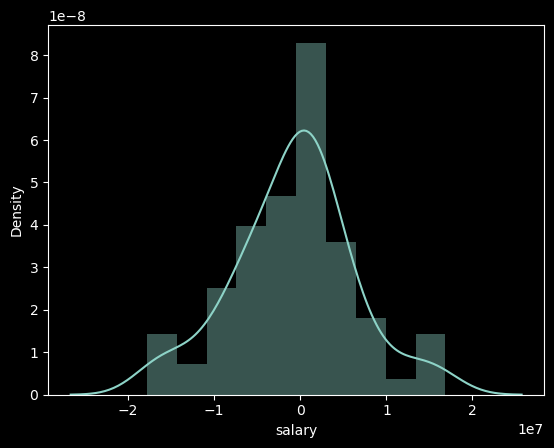

In [27]:
import seaborn as sns
sns.distplot(diff)

In [ ]:
import pickle
pickle.dump(lr, open('./model.sav', 'wb'))